# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [1]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [3]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

TypeError: ignored

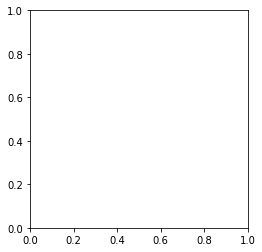

In [4]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0]).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [3]:
y_train.shape

(60000,)

In [4]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [7]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout #과적합 방지, 몇 퍼 정돌를 날릴 지를 설정함
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer #과적합 방지,L1이랑 L2 중에서 어느 걸 사용할지에 대해서 확인하는 방법 별도의 공부 필요
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [3]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation = 'softmax'),
])

내가 만든 모델을 확인해 봅시다.

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               4

In [5]:
#현재 data를 따로 one-hot encoding 하지 않았기 때문에, sparse categorical corssentropy를 사용한다

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model을 자유롭게 train 해봅시다.  

In [8]:
model.fit(
    x_train,
    y_train,
    batch_size = 100,
    epochs = 100,
    validation_data = (x_test, y_test)
)

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0295 - accuracy: 0.9914 - val_loss: 0.0972 - val_accuracy: 0.9811
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.1004 - val_accuracy: 0.9809
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0877 - val_accuracy: 0.9810
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0226 - accuracy: 0.9935 - val_loss: 0.1024 - val_accuracy: 0.9788
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0185 - accuracy: 0.9951 - val_loss: 0.1010 - val_accuracy: 0.9825
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.1008 - val_accuracy: 0.9830
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0167 - accuracy: 0.9955 - val_loss: 0.0961 - val_accuracy: 0.9814

95%이상의 성능을 가진 모델을 만들면 완성!

In [9]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.3235 - accuracy: 0.9827 - 818ms/epoch - 3ms/step

Accuracy: 0.982699990272522


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)